In [78]:
# lista de import de librerias que seran utilizadas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np
sns.set(style="white")

### En el analisis individual de cada moneda se tomaran en cuenta las 10 monedas volatiles con mayor capitalizacion, ya que son las que varian de precio en el tiempo y por lo tanto se puede saca una ganancia de ellas en contraparte de las monedas estables que tambien tiene variacion pero son imperseptibles para el mercado y su principal uso es para congelar las ganancias.

In [129]:
# Utiliza la funcion read_csv de pandas, para leer el archivo csv y tranformarlo en un dataframe
df_BTC = pd.read_csv("./Data/Bitcoin.csv",delimiter=',')
df_BTC.head()

,Price_usd,Market_cap,Volume,Date
0,4297,71329258156,720251082,2017-09-30 00:00:00
1,6368,106082152741,1800486324,2017-10-31 00:00:00
2,10406,173903131019,7443964832,2017-11-30 00:00:00
3,14839,248925602660,2921202870,2017-12-31 00:00:00
4,9989,168188285150,3804947187,2018-01-31 00:00:00


In [86]:
# Informacion basica de las columnas del dataframe
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price_usd   72 non-null     int64 
 1   Market_cap  72 non-null     int64 
 2   Volume      72 non-null     int64 
 3   Date        72 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.4+ KB


In [87]:
df_BTC.describe()

,Price_usd,Market_cap,Volume
count,72.000000,7.200000e+01,7.200000e+01
mean,20368.625000,3.807349e+11,2.244135e+10
std,15777.095133,3.013645e+11,1.569520e+10
min,3457.000000,6.055537e+10,7.202511e+08
25%,8154.750000,1.438248e+11,7.837457e+09
50%,12754.500000,2.325526e+11,2.229303e+10
75%,29574.250000,5.747739e+11,3.193918e+10
max,61837.000000,1.166424e+12,6.210207e+10


In [88]:
# COnvierte la columna Data de tipo de dato texto a tipo de dato datetime
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])

In [90]:
# Crea un grafico de cajas ingresando como parametro una columna.
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.xlabel('Precios')
    plt.show()

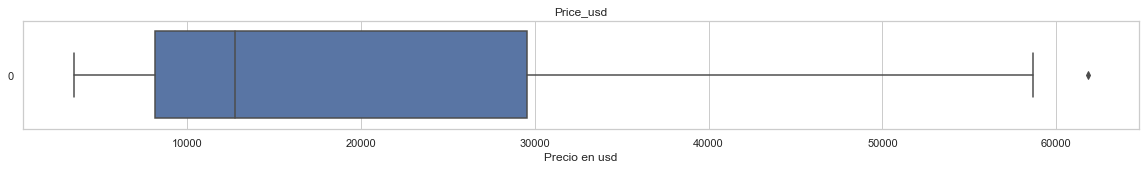

In [126]:
boxplot(df_BTC['Price_usd'])

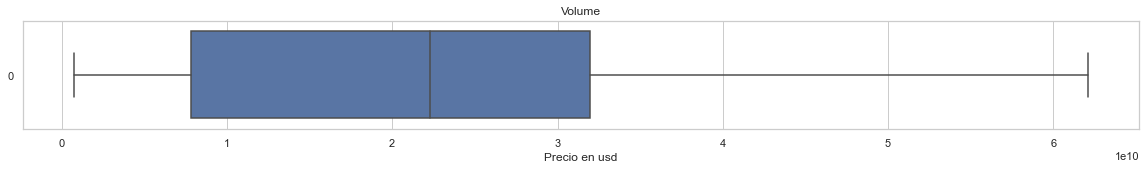

In [127]:
boxplot(df_BTC['Volume'])

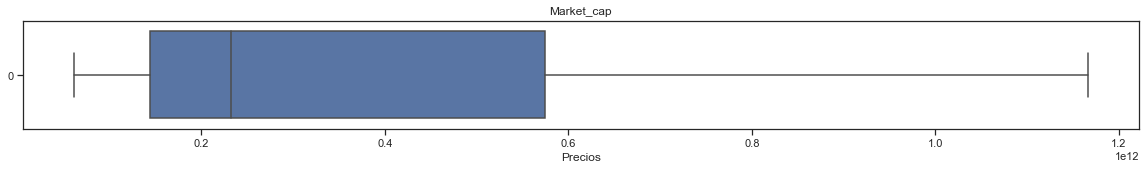

In [93]:
boxplot(df_BTC['Market_cap'])

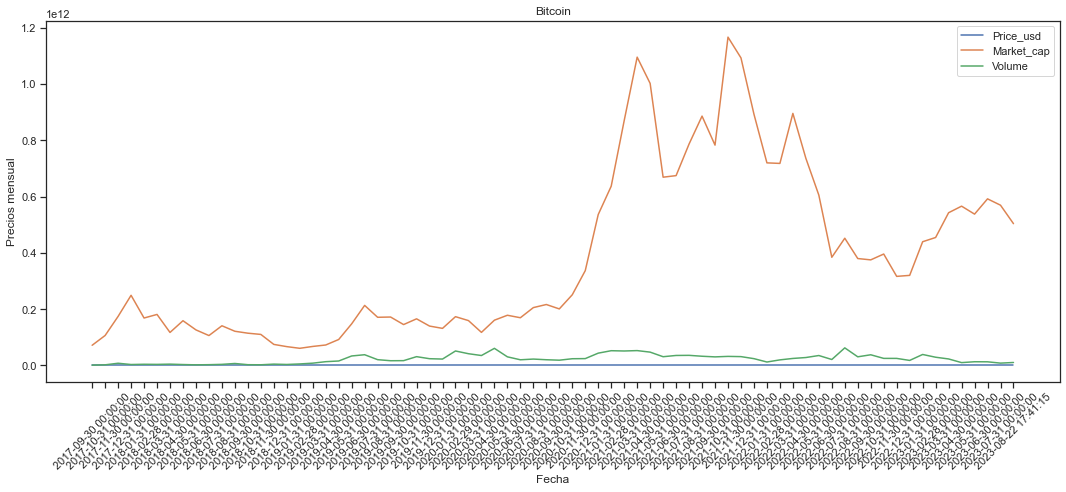

In [130]:
# Crea un grafico de lineas con la libreria seaborn de las columnas seleccionadas en el bucle for.
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
for column in df_BTC.columns[:3]:
    sns.lineplot(data=df_BTC, x='Date', y=column, label=column)
plt.title('Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precios mensual')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\1932256394.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_BTC.corr(), annot=True, cmap="coolwarm", center=0)


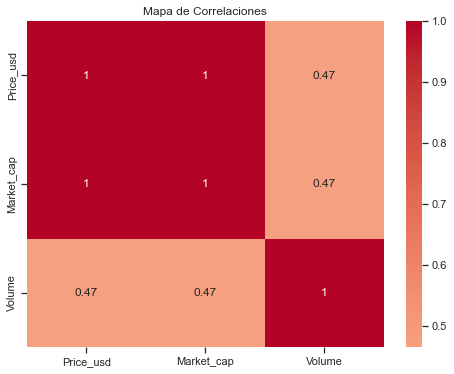

In [95]:
# Crea un grafico de correlaciones 
plt.figure(figsize=(8, 6))
sns.heatmap(df_BTC.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Correlaciones")
plt.show()

In [96]:
# Crea un grafico 
def _hist(column):
    sns.set(style="white")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_BTC, x=column)
    plt.title("Histograma de Columna BTC")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

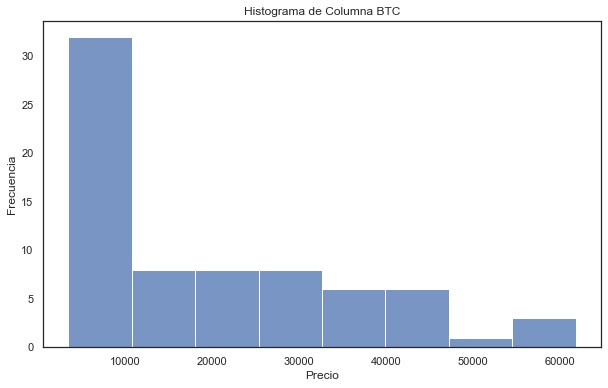

In [97]:
_hist('Price_usd')

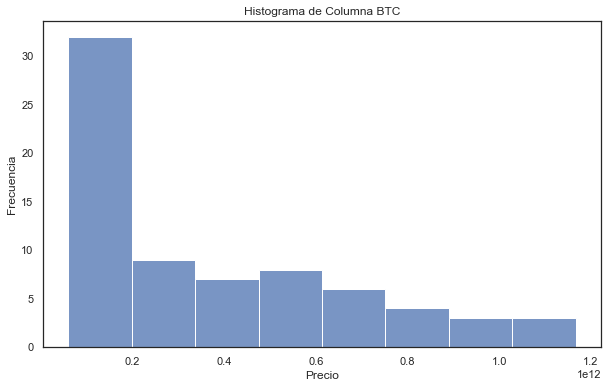

In [98]:
_hist('Market_cap')

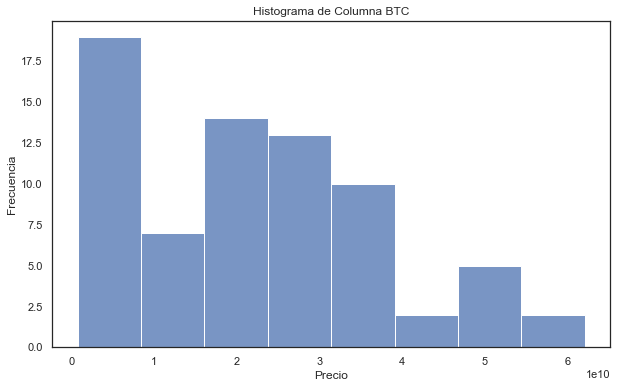

In [99]:
_hist('Volume')

In [100]:
def _sactter(ycolumn,xcolumn):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_BTC[xcolumn], df_BTC[ycolumn])
    plt.title("Gráfico de Dispersión BTC")
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.show()

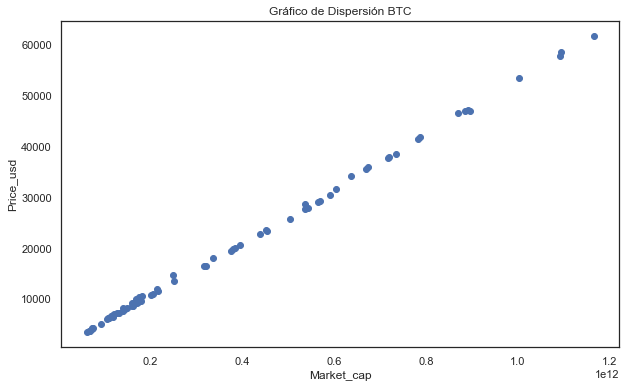

In [101]:
_sactter('Price_usd','Market_cap')

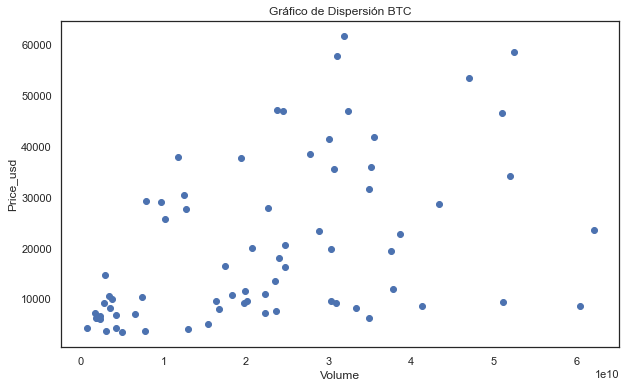

In [102]:
_sactter('Price_usd','Volume')

<AxesSubplot: xlabel='Price_usd', ylabel='Volume'>

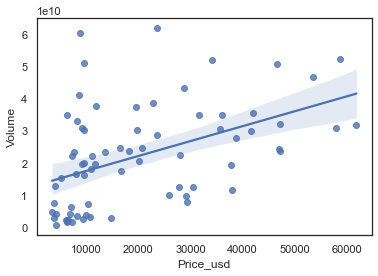

In [103]:
sns.regplot(x='Price_usd', y= 'Volume', data=df_BTC)

***

# Analisis Global de criptomonedas

In [109]:
df_global = pd.read_csv('./Data/all_coins.csv',delimiter=',')
df_global.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,last_updated
0,bitcoin,btc,Bitcoin,26477.000000,516069624358,1,1.679656e+10,2023-08-24T01:15:25.836Z
1,ethereum,eth,Ethereum,1680.240000,202213513704,2,1.087880e+10,2023-08-24T01:15:22.055Z
2,tether,usdt,Tether,0.999915,82883533004,3,1.387413e+10,2023-08-24T01:15:00.324Z
3,binancecoin,bnb,BNB,216.210000,33280919099,4,5.567175e+08,2023-08-24T01:15:25.924Z
4,ripple,xrp,XRP,0.526931,27924597746,5,9.426082e+08,2023-08-24T01:15:27.672Z


In [110]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               250 non-null    object 
 1   symbol           250 non-null    object 
 2   name             250 non-null    object 
 3   current_price    250 non-null    float64
 4   market_cap       250 non-null    int64  
 5   market_cap_rank  250 non-null    int64  
 6   total_volume     250 non-null    float64
 7   last_updated     250 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 15.8+ KB


# Análisis univariable

<AxesSubplot: xlabel='current_price', ylabel='Count'>

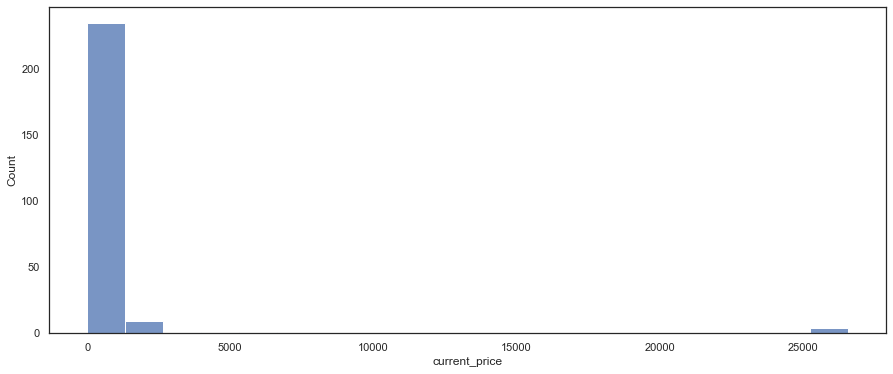

In [111]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_global,x='current_price',bins=20)

<AxesSubplot: xlabel='market_cap', ylabel='Count'>

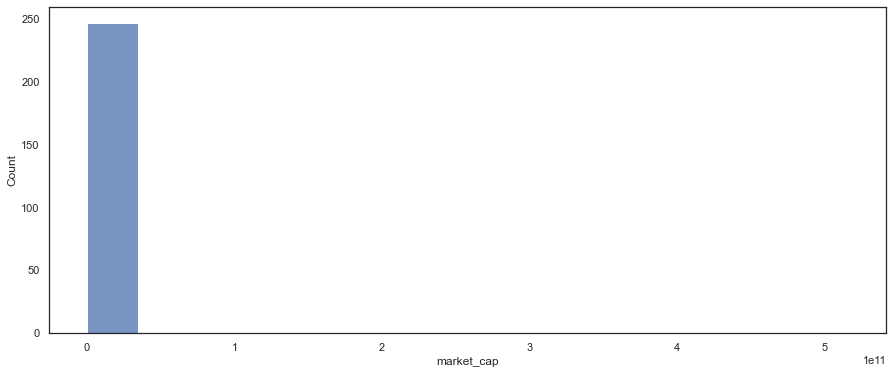

In [112]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_global,x='market_cap',bins=15)

<AxesSubplot: xlabel='total_volume', ylabel='Count'>

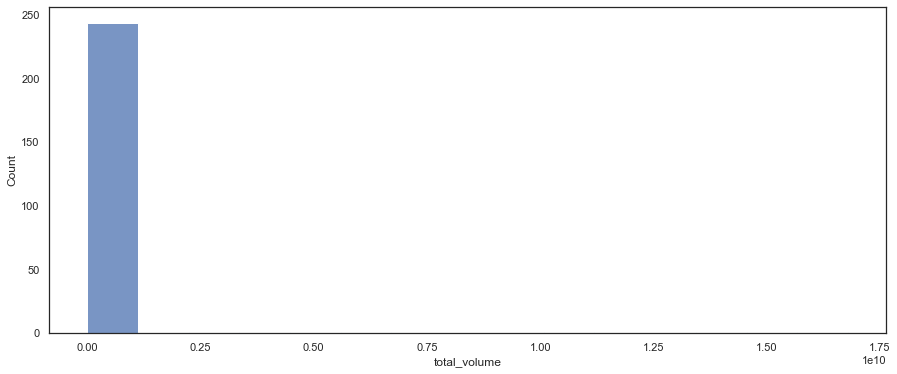

In [113]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_global,x='total_volume',bins=15)

In [114]:
# Crea un grafico de cajas ingresando como parametro una columna.
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.xlabel('Precio en usd')
    plt.show()

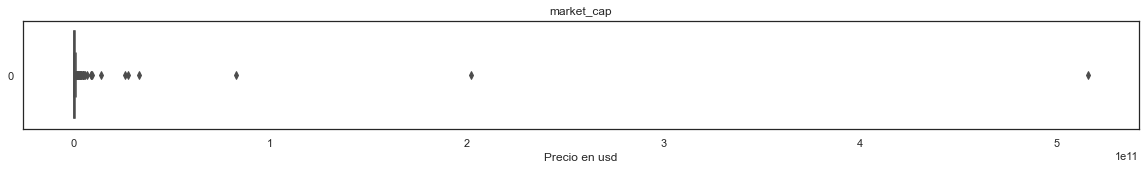

In [115]:
boxplot(df_global['market_cap'])

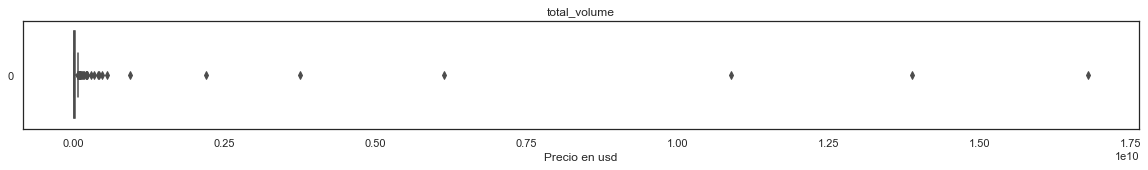

In [116]:
boxplot(df_global['total_volume'])

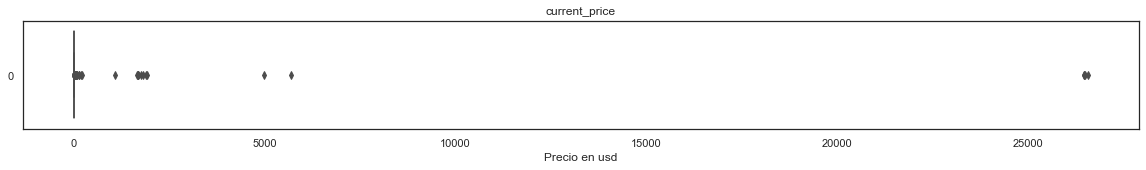

In [117]:
boxplot(df_global['current_price'])

C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\1798643221.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_global['market_cap'], shade=True, color="b")


<AxesSubplot: xlabel='market_cap', ylabel='Density'>

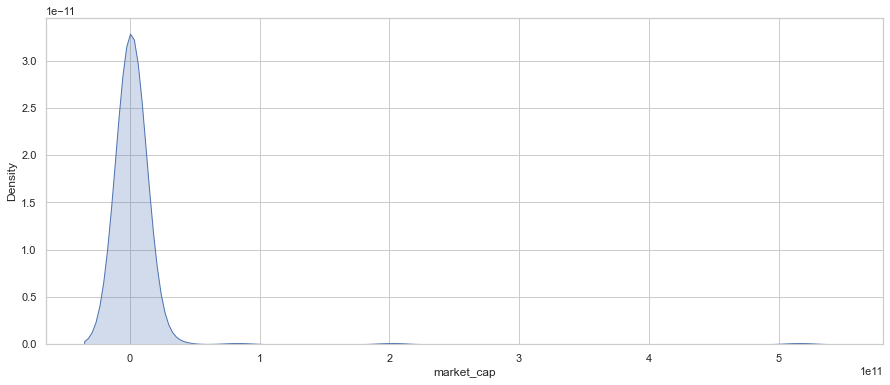

In [118]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.kdeplot(df_global['market_cap'], shade=True, color="b")

C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\2463404057.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_global['total_volume'], shade=True, color="b")


<AxesSubplot: xlabel='total_volume', ylabel='Density'>

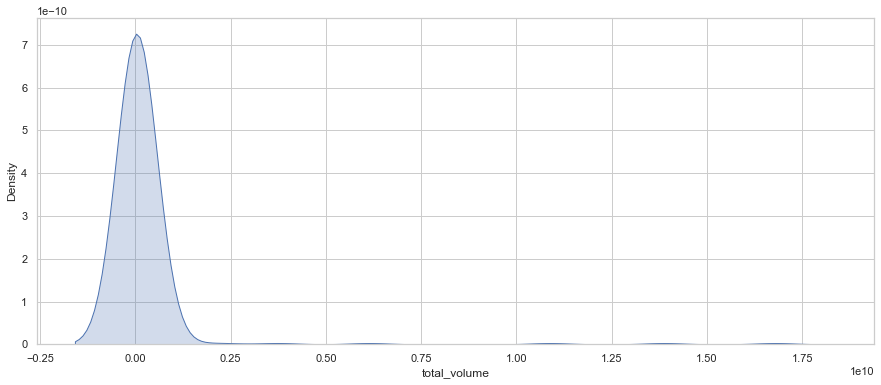

In [119]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.kdeplot(df_global['total_volume'], shade=True, color="b")

C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\300897550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_global['current_price'], shade=True, color="b")


<AxesSubplot: xlabel='current_price', ylabel='Density'>

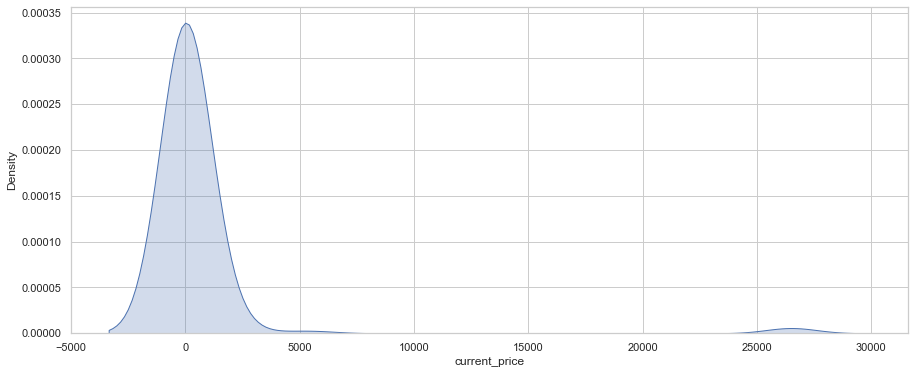

In [120]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.kdeplot(df_global['current_price'], shade=True, color="b")

## Análisis multivariable

In [121]:
df_torta = df_global
market_cap_others = df_torta.drop(range(0,10))
sum_cap_others = sum(market_cap_others['market_cap'][10:])
df_torta.drop(range(10,250),inplace=True)
df_torta = df_torta.append({'name': 'Otras', 'market_cap': sum_cap_others}, ignore_index=True)
df_torta

C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\618315431.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sum_cap_others = sum(market_cap_others['market_cap'][10:])
C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\618315431.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_torta = df_torta.append({'name': 'Otras', 'market_cap': sum_cap_others}, ignore_index=True)


,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,last_updated
0,bitcoin,btc,Bitcoin,26477.000000,516069624358,1.0,1.679656e+10,2023-08-24T01:15:25.836Z
1,ethereum,eth,Ethereum,1680.240000,202213513704,2.0,1.087880e+10,2023-08-24T01:15:22.055Z
2,tether,usdt,Tether,0.999915,82883533004,3.0,1.387413e+10,2023-08-24T01:15:00.324Z
3,binancecoin,bnb,BNB,216.210000,33280919099,4.0,5.567175e+08,2023-08-24T01:15:25.924Z
4,ripple,xrp,XRP,0.526931,27924597746,5.0,9.426082e+08,2023-08-24T01:15:27.672Z
5,usd-coin,usdc,USD Coin,0.999847,26008079637,6.0,6.132346e+09,2023-08-24T01:15:27.947Z
6,staked-ether,steth,Lido Staked Ether,1679.640000,14013410833,7.0,1.134826e+07,2023-08-24T01:15:27.549Z
7,cardano,ada,Cardano,0.268961,9441718813,8.0,1.791485e+08,2023-08-24T01:15:21.739Z
8,dogecoin,doge,Dogecoin,0.063839,8988778604,9.0,3.333835e+08,2023-08-24T01:15:27.769Z
9,solana,sol,Solana,21.700000,8860517376,10.0,4.191633e+08,2023-08-24T01:15:19.468Z


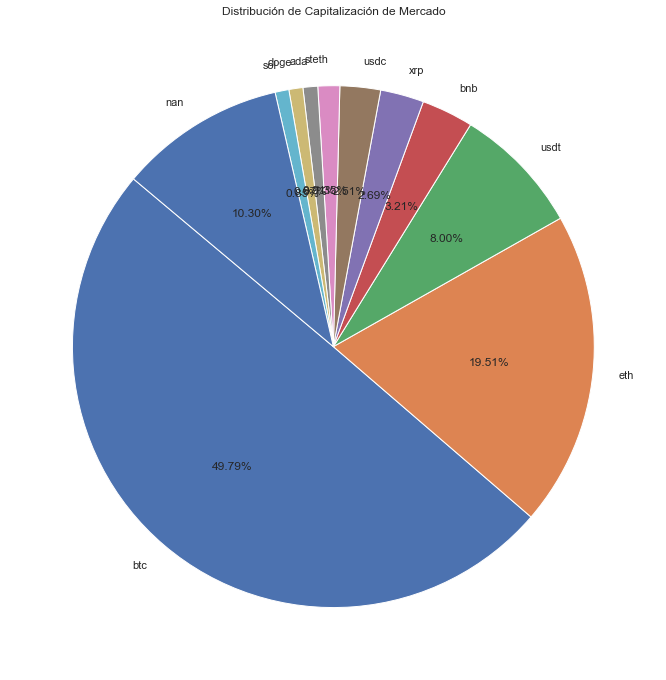

In [122]:
plt.figure(figsize=(12, 12))
plt.title('Distribución de Capitalización de Mercado')
plt.pie(df_torta['market_cap'], labels=df_torta['symbol'], autopct='%1.2f%%', startangle=140)
plt.show()

C:\Users\Guille\AppData\Local\Temp\ipykernel_11672\2990318844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_global.corr()


<AxesSubplot: >

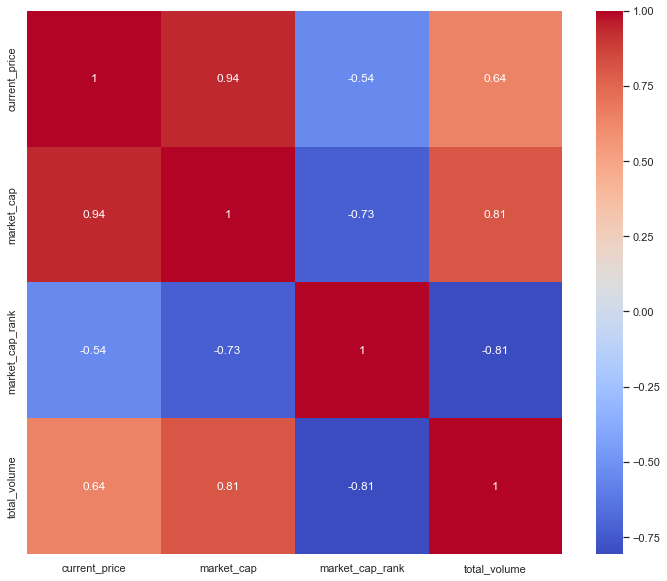

In [123]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_global.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='current_price', ylabel='market_cap'>

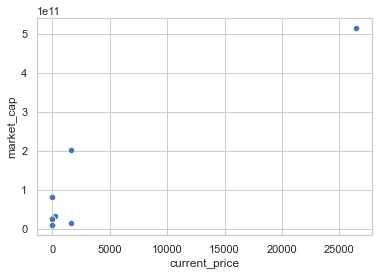

In [124]:
sns.scatterplot(x=df_global['current_price'], y=df_global['market_cap'])

<AxesSubplot: xlabel='total_volume', ylabel='market_cap'>

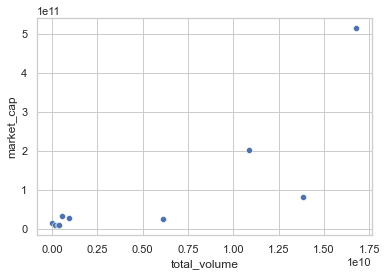

In [125]:
sns.scatterplot(x=df_global['total_volume'], y=df_global['market_cap'])

***

# Análisis de Exchanges

Un "exchange" es una plataforma en línea donde puedes comprar, vender o intercambiar activos financieros como criptomonedas, acciones o divisas. Actúa como intermediario facilitando estas transacciones. 

In [18]:
# Lectura del archivo csv para su exploracion
df_exchanges = pd.read_csv('./Data/exchanges.csv',delimiter=',')
df_exchanges.head(10)

,id,name,year_established,country,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,10,1,219585.526866,146758.949175
1,gdax,Coinbase Exchange,2012.0,United States,10,2,30348.020205,30348.020205
2,bybit_spot,Bybit,2018.0,British Virgin Islands,10,3,29942.294454,29942.294454
3,huobi,Huobi,2013.0,Seychelles,10,4,42694.725038,22099.018034
4,kraken,Kraken,2011.0,United States,10,5,16638.950126,14643.816678
5,kucoin,KuCoin,2014.0,Seychelles,10,6,10519.058833,10519.058833
6,bitfinex,Bitfinex,2012.0,British Virgin Islands,10,7,3196.346335,2445.707654
7,binance_us,Binance US,2019.0,United States,10,8,329.918987,329.918987
8,okex,OKX,2017.0,Seychelles,9,9,25211.850144,25211.850144
9,gate,Gate.io,NaN,Cayman Islands,9,10,17772.268871,17772.268871


In [19]:
df_exchanges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               100 non-null    object 
 1   name                             100 non-null    object 
 2   year_established                 76 non-null     float64
 3   country                          86 non-null     object 
 4   trust_score                      100 non-null    int64  
 5   trust_score_rank                 100 non-null    int64  
 6   trade_volume_24h_btc             100 non-null    float64
 7   trade_volume_24h_btc_normalized  100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


#### Faltan datos en la columna year_established y country.

In [20]:
df_exchanges.describe()

,year_established,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
count,76.000000,100.000000,100.000000,100.000000,100.000000
mean,2016.947368,7.320000,50.500000,10214.805598,7254.358642
std,2.712415,1.196628,29.011492,25179.166545,16370.703267
min,2011.000000,6.000000,1.000000,2.785251,2.785251
25%,2014.000000,6.000000,25.750000,381.866581,372.367009
50%,2018.000000,7.000000,50.500000,1843.942370,1772.315490
75%,2018.000000,8.000000,75.250000,11547.010749,8566.808856
max,2022.000000,10.000000,100.000000,219585.526866,146758.949175


#### Los valores numericos no presentan anomalias

# Análisis univariable

### Grafico de caja

<AxesSubplot: xlabel='trade_volume_24h_btc'>

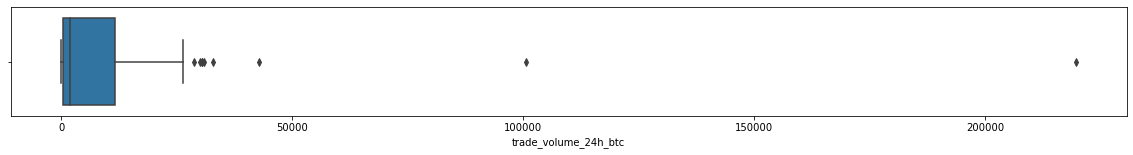

In [21]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trade_volume_24h_btc')

<AxesSubplot: xlabel='trade_volume_24h_btc_normalized'>

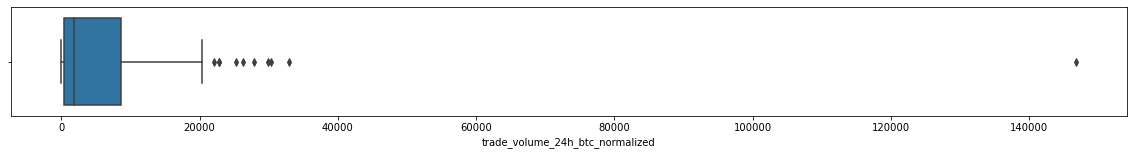

In [22]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trade_volume_24h_btc_normalized')

<AxesSubplot: xlabel='trust_score'>

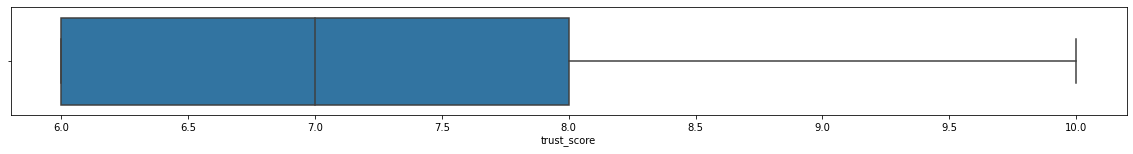

In [23]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_exchanges,x='trust_score')

### Histogramas

<AxesSubplot: xlabel='trade_volume_24h_btc', ylabel='Count'>

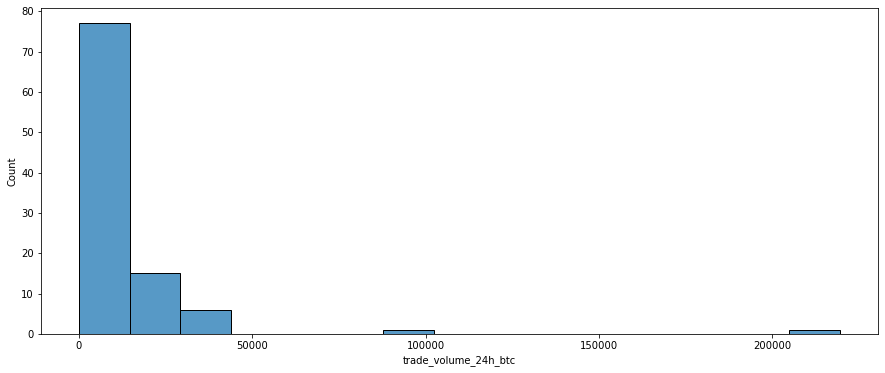

In [24]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_exchanges,x='trade_volume_24h_btc',bins=15)

<AxesSubplot: xlabel='year_established', ylabel='Count'>

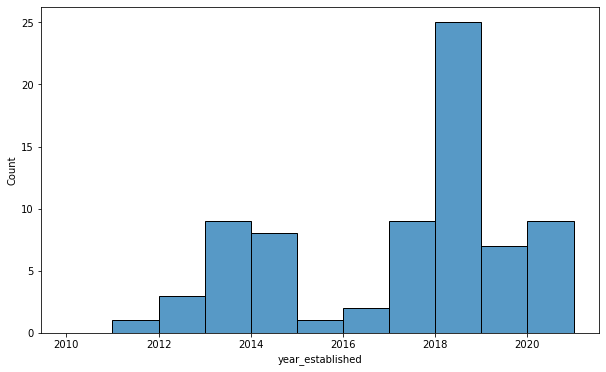

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_exchanges,x='year_established',bins=np.arange(2010,2022,1))

### Grafico de barras que muestra la cantidad de veces que se repite un dato en la columna year_established

<AxesSubplot: xlabel='year_established', ylabel='count'>

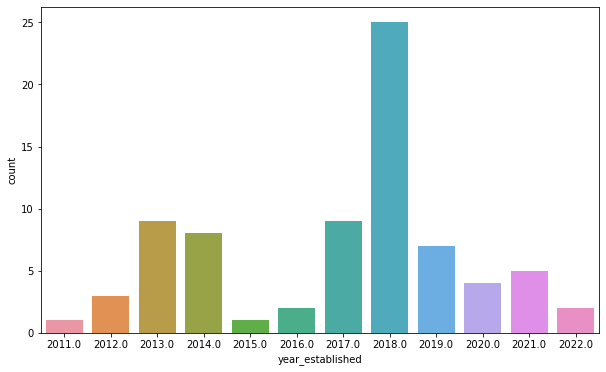

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_exchanges,x='year_established')

#### Se observa que el año en el que se fundaron mas exchanges fue en el 2018

### Grafico de barras para visualizar la cantidad de veces que un exchange se en cuentra en un pais

<AxesSubplot: xlabel='country', ylabel='count'>

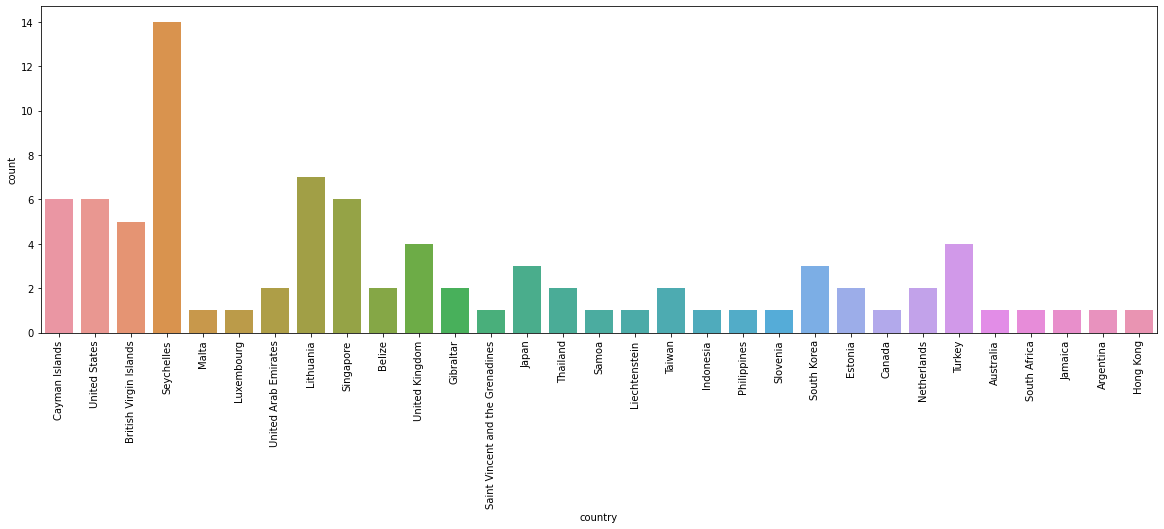

In [27]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_exchanges,x='country')

#### El pais que alberga mas echanges es Seychelles que un archipiélago, frente a africa oriental.

## Análisis multivariable

Esta lista muestra los 10 paises con mayor volumen de movimiento de bitcoin normalizado

In [33]:
df_exchanges[['country','trade_volume_24h_btc','trade_volume_24h_btc_normalized']].groupby('country').sum().sort_values('trade_volume_24h_btc_normalized',ascending=False).head(10)

,trade_volume_24h_btc,trade_volume_24h_btc_normalized
country,,
Cayman Islands,306466.322381,217075.225811
Seychelles,314063.355955,181273.087522
British Virgin Islands,76943.283084,72080.860843
Lithuania,61494.701631,51784.514802
United States,48027.813903,46032.680455
United Arab Emirates,30189.572686,30189.572686
South Korea,33132.795461,27294.172344
Singapore,46111.778642,26022.821716
Estonia,10988.456025,10988.456025


trade_volume_24h_btc: Volumen de Bitcoin que se mueven en 24hs

trade_volume_24h_btc_normalized: Volumen de Bitcoin que se mueven en 24hs de forma normalizada para que este valor no sea afectado por altas volatilidades

Se utiliza como guia para el top de paises con mayor volumen de bitcoin la variable trade_volume_24h_btc_normalized ya que como se menciona anteriormente es un dato que se tiene en cuenta historicamente y por lo tanto muestra informacion mas valiosa.